# Summary of Silverstone

Some basic summary plots of a lap around Silverstone...

In [3]:
# Load libraries
import fastf1 as ff1
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

# Define session
year = 2024
race = 'Silverstone'
ses = 'Q'

# Define color palette
colormap = mpl.cm.plasma

# Load and confirm session information
session = ff1.get_session(year, race, ses)
session

2024 Season Round 12: British Grand Prix - Qualifying

In [ ]:
# Load extended session information, and pole setting lap
session.load()

lap = session.laps.pick_drivers('RUS').pick_fastest()

core           INFO 	Loading data for British Grand Prix - Qualifying [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['63', '44', '4', '1', '81', '27', '55', '18', '23', '14', '16', '2', '22', '24', '3', '77', '20', '31', '11', '10']


## Track map

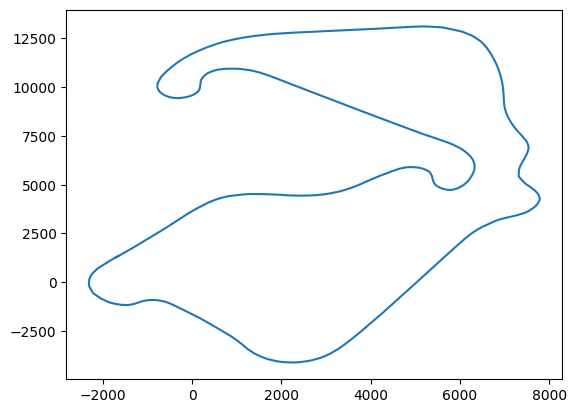

In [16]:
# TODO: Prettier plot
plt.plot(
  lap.telemetry['X'],
  lap.telemetry['Y']
)

## Speed analysis

In [ ]:
# Isolate lap speed measurements
speed = lap.telemetry['Speed']

# speed is a pandas Series, which can be 
speed.describe()

count    647.000000
mean     246.927953
std       66.906071
min       90.000000
25%      204.000000
50%      273.337501
75%      300.000000
max      325.000000
Name: Speed, dtype: float64

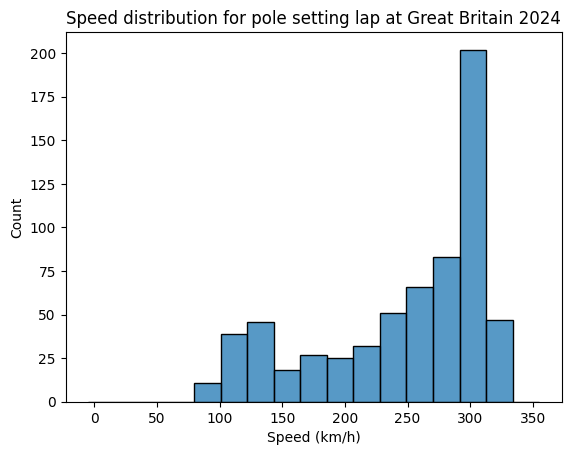

In [11]:
sns.histplot(
  speed,
  binrange=(-5,355)
)
plt.xlabel('Speed (km/h)')
plt.ylabel('Count')
plt.title('Speed distribution for pole setting lap at Great Britain 2024')
plt.show()

## Throttle analysis

In [17]:
throttle = lap.telemetry['Throttle']

throttle.describe()

count    647.000000
mean      79.528158
std       35.314173
min        0.000000
25%       67.809333
50%      100.000000
75%      100.000000
max      100.000000
Name: Throttle, dtype: float64

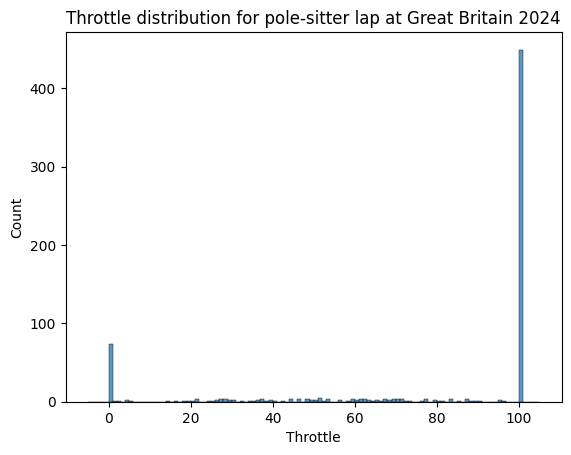

In [58]:
sns.histplot(
  throttle,
  binrange=(-5,105),
  bins=110
)
plt.title('Throttle distribution for pole-sitter lap at Great Britain 2024')
plt.show()

## Gear utilization

Text(0.5, 1.0, 'Gear utilization across pole setting lap')

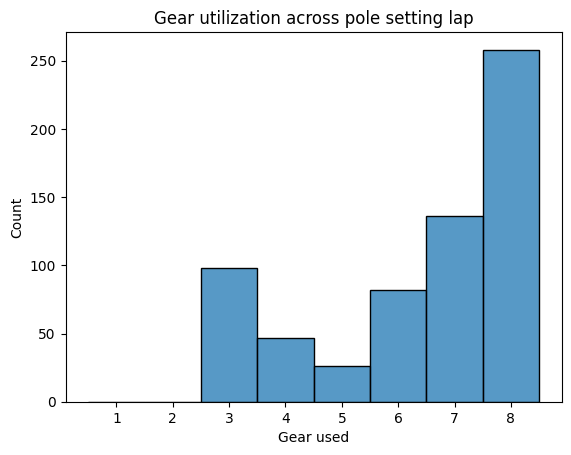

In [27]:
gear = lap.telemetry['nGear']

sns.histplot(
  gear,
  binrange=(1,8),
  discrete=True
)
plt.xlabel('Gear used')
plt.title('Gear utilization across pole setting lap')

In [59]:
lap.telemetry

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2024-07-06 15:08:48.897,0 days 01:21:35.888000,,NaN,0 days 00:00:00,10860.945381,263.300341,7,100.0,False,8,interpolation,1.072316,0.000184,OnTrack,-1710.088465,1266.656387,1964.218718
3,2024-07-06 15:08:49.351,0 days 01:21:36.342000,,NaN,0 days 00:00:00.454000,11134.688328,271.047783,7,100.0,False,8,pos,35.621964,0.006107,OnTrack,-1501.000000,1536.000000,1966.000000
4,2024-07-06 15:08:49.524,0 days 01:21:36.515000,,NaN,0 days 00:00:00.627000,11239.000000,274.000000,7,100.0,False,8,car,48.771667,0.008362,OnTrack,-1418.292735,1641.661900,1966.543594
5,2024-07-06 15:08:49.651,0 days 01:21:36.642000,,NaN,0 days 00:00:00.754000,11324.930419,274.000000,7,100.0,False,8,pos,58.421626,0.010016,OnTrack,-1361.000000,1716.000000,1967.000000
6,2024-07-06 15:08:49.725,0 days 01:21:36.716000,,NaN,0 days 00:00:00.828000,11375.000000,274.000000,7,100.0,False,8,car,64.070000,0.010985,OnTrack,-1330.331949,1756.736461,1967.320572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,2024-07-06 15:10:14.205,0 days 01:23:01.196000,,NaN,0 days 00:01:25.308000,11284.000000,253.000000,6,100.0,False,8,car,5795.395833,0.993620,OnTrack,-1925.639794,977.937280,1962.408426
645,2024-07-06 15:10:14.311,0 days 01:23:01.302000,,NaN,0 days 00:01:25.414000,11104.094227,254.177779,6,100.0,False,8,pos,5802.936272,0.994913,OnTrack,-1883.000000,1037.000000,1963.000000
646,2024-07-06 15:10:14.565,0 days 01:23:01.556000,,NaN,0 days 00:01:25.668000,10673.000000,257.000000,7,100.0,False,8,car,5821.095833,0.998026,OnTrack,-1777.775266,1181.973284,1962.984341
647,2024-07-06 15:10:14.571,0 days 01:23:01.562000,,NaN,0 days 00:01:25.674000,10675.587555,257.075002,7,100.0,False,8,pos,5821.526497,0.998100,OnTrack,-1774.000000,1187.000000,1963.000000


## Lap telemetry

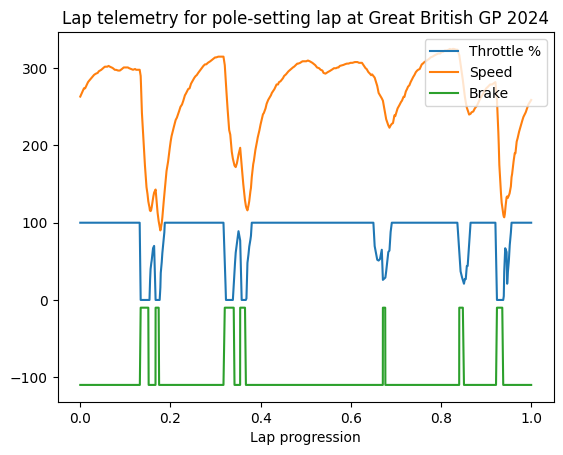

In [66]:
plt.plot(
  lap.telemetry['RelativeDistance'],
  lap.telemetry['Throttle'],
)
plt.plot(
  lap.telemetry['RelativeDistance'],
  lap.telemetry['Speed']
)
plt.plot(
  lap.telemetry['RelativeDistance'],
  (lap.telemetry['Brake'] * 100) - 110
)
plt.title('Lap telemetry for pole-setting lap at Great British GP 2024')
plt.xlabel('Lap progression')
plt.legend(['Throttle %', 'Speed', 'Brake'])
plt.show()

---

This is the end of the notebook.